<a href="https://colab.research.google.com/github/KapoorAkshit18/VSD-Real-World-Edge-AI-Lab/blob/main/Related%20Files/python_notebook/vsd_session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('student-scores.csv')

        id first_name last_name                                    email  \
0        1       Paul     Casey           paul.casey.1@gslingacademy.com   
1        2   Danielle  Sandoval    danielle.sandoval.2@gslingacademy.com   
2        3       Tina   Andrews         tina.andrews.3@gslingacademy.com   
3        4       Tara     Clark           tara.clark.4@gslingacademy.com   
4        5    Anthony    Campos       anthony.campos.5@gslingacademy.com   
...    ...        ...       ...                                      ...   
1995  1996       Alan  Reynolds     alan.reynolds.1996@gslingacademy.com   
1996  1997     Thomas   Gilbert    thomas.gilbert.1997@gslingacademy.com   
1997  1998    Madison     Cross     madison.cross.1998@gslingacademy.com   
1998  1999   Brittany   Compton  brittany.compton.1999@gslingacademy.com   
1999  2000    Natalie     Smith     natalie.smith.2000@gslingacademy.com   

      gender  part_time_job  absence_days  extracurricular_activities  \
0       male  

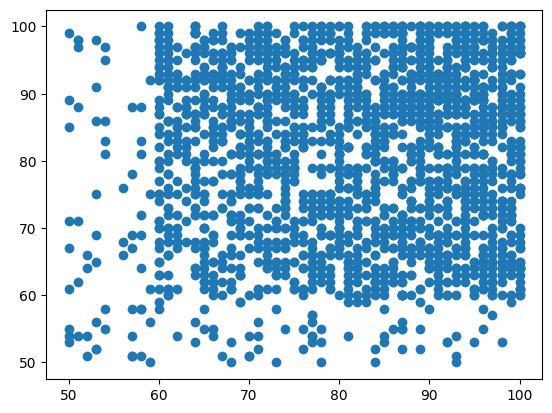

In [5]:
plt.scatter(dataset['physics_score'],dataset['history_score'])

In [6]:
# making sure the values are not of type string from the csv.
X = dataset[['history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']].values # Selects only numerical score columns as features, excluding 'math_score'
Y = dataset['math_score'].values # Selects a numerical target variable (e.g., 'math_score')

In [7]:
print(X)

[[ 81  93  97  63  80  87]
 [ 86  96 100  90  88  90]
 [ 97  95  96  65  77  94]
 ...
 [ 85  63  93  68  94  78]
 [ 96  72  89  95  88  75]
 [ 99  91  69  83  93 100]]


In [8]:
print(Y)

[73 90 81 ... 97 51 82]


Y=mX+c

In [9]:
class Model():         # class for the eqn of line
  def __init__(self, learning_rate, iterations):
#learning rate is for change

    self.learning_rate = learning_rate
    self.iterations = iterations

  # prediction method
  def predict(self,X):
    return X.dot(self.slope) + self.const

  # fit method for best constants
  def fit(self, X, Y):   # initial line
    self.m, self.n = X.shape
    self.slope = np.zeros(self.n)
    self.const = 0
    self.X = X
    self.Y = Y

    for i in range(self.iterations):
      self.update_weights()                 #update for best fitting
    return self

  def update_weights(self):
    Y_pred = self.predict(self.X)
    # output original position to the intended position by maths.
    dW = - (2* (self.X.T).dot(self.Y - Y_pred )) / self.m
    #gradient for the constant
    db = - 2 * np.sum(self.Y - Y_pred) / self.m

    self.slope -= self.learning_rate * dW
    self.const -= self.learning_rate * db
    return self

Model Getting Ready

In [13]:
model = Model(learning_rate=0.00001, iterations=1000)
model.fit(X,Y)

In [14]:
Y_pred = model.predict(X)
print(Y_pred)

[87.29932483 94.45417776 91.27063089 ... 84.22352775 88.54404998
 92.42849593]


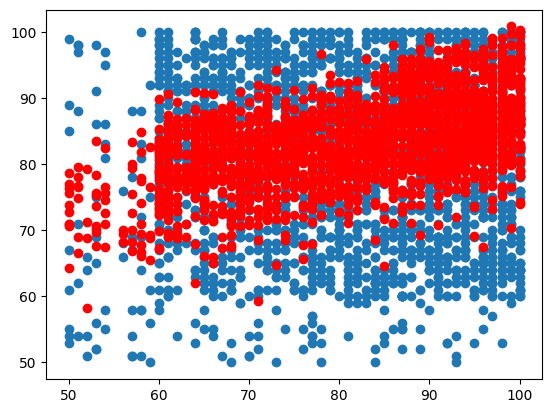

In [16]:
#plot
plt.scatter(dataset['physics_score'],dataset['history_score'])
plt.scatter(dataset['physics_score'],Y_pred,color='red')
plt.show()

Linear Regression


In [26]:
print(model.parameters['m'],model.parameters['c'])

-0.04263735295527116 -0.8642166188945148


Forward and Backward propagation.

In [30]:
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation
class LinearRegression:
  def __init__(self):
    self.parameters = {}

  def forward_propagation(self, train_input):
    a = self.parameters['m']
    c = self.parameters['c']
    predictions = np.multiply(a, train_input) * c
    return predictions

  def cost_function(self, predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2 )
    return cost

  def backward_propagation(self, predictions, train_input, train_output):
    derivatives = {}
    df = (predictions - train_output)
    dm = 2 * np.mean(np.multiply(df, train_input))
    dc = 2 * np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

  def update_parameters(self, derivatives, learning_rate):
    self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
    self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

  def train(self, train_input, train_output, learning_rate, iters):
    self.parameters['m'] = np.random.uniform(0,1) * -1
    self.parameters['c'] = np.random.uniform(0,1) * -1

    self.loss = []

    fig, ax = plt.subplots()
    x_vals = np.linspace(min(train_input), max(train_input), 100)
    line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color= 'red', label = 'Regression Line')
    ax.scatter(train_input, train_output, marker = 'o', color = 'green', label = 'Training Data' )

    ax.set_ylim(0,max(train_output) + 1)

#accomplishment of backward propagation using update function

    def update(frame):
        predictions = self.forward_propagation(train_input)
        cost = self.cost_function(predictions, train_output)
        derivatives = self.backward_propagation(predictions, train_input, train_output)
        self.update_parameters(derivatives, learning_rate)
        line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
        self.loss.append(cost)
        print("Iteration = {}, Loss = {}" .format(frame + 1, cost))
        return line,

    ani = FuncAnimation(fig, update, frames = iters, interval = 100, blit = True)
    ani.save('linear_regression_A.gif', writer = 'ffmpeg')

    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

    return self.parameters, self.loss

Iteration = 1, Loss = 6061.704655212658
Iteration = 1, Loss = 6214.322228556279
Iteration = 1, Loss = 6365.960434921948
Iteration = 1, Loss = 6516.273982001285
Iteration = 2, Loss = 6664.908555431103
Iteration = 3, Loss = 6811.502116879398
Iteration = 4, Loss = 6955.686313057585
Iteration = 5, Loss = 7097.087989833418
Iteration = 6, Loss = 7235.3308042202325
Iteration = 7, Loss = 7370.036925625335
Iteration = 8, Loss = 7500.8288163746165
Iteration = 9, Loss = 7627.331080213515
Iteration = 10, Loss = 7749.172366239231
Iteration = 11, Loss = 7865.987314567963
Iteration = 12, Loss = 7977.41852900663
Iteration = 13, Loss = 8083.1185611024775
Iteration = 14, Loss = 8182.75188920667
Iteration = 15, Loss = 8275.996875627996
Iteration = 16, Loss = 8362.547684586654
Iteration = 17, Loss = 8442.116143519239
Iteration = 18, Loss = 8514.433530345359
Iteration = 19, Loss = 8579.252269590716
Iteration = 20, Loss = 8636.347520774376
Iteration = 21, Loss = 8685.518643208836
Iteration = 22, Loss = 8726

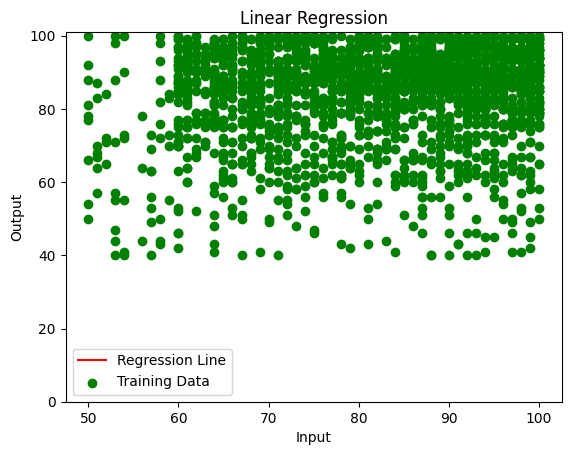

In [32]:
model = LinearRegression()
parameters, loss = model.train(X[:,1], Y , learning_rate= 0.00001, iters = 1000)

Lab 2


In [38]:
dataset = pd.read_csv('50_Startups.csv')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

# Apply OneHotEncoder to the 'State' column (index 3)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [39]:
print (X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [40]:
print(Y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [44]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [46]:
y_pred = regressor.predict(X_test)
print(y_pred)

[103015.20159795 132582.27760816 132447.73845175  71976.09851258
 178537.48221057 116161.24230167  67851.69209676  98791.73374687
 113969.43533014 167921.06569552]


In [47]:
for i, (pred, actual) in enumerate(zip(y_pred,Y_test)):
  print(f"Sample {i+1}, Predicted = {pred:.2f}, Actual = {actual:.2f}")

Sample 1, Predicted = 103015.20, Actual = 103282.38
Sample 2, Predicted = 132582.28, Actual = 144259.40
Sample 3, Predicted = 132447.74, Actual = 146121.95
Sample 4, Predicted = 71976.10, Actual = 77798.83
Sample 5, Predicted = 178537.48, Actual = 191050.39
Sample 6, Predicted = 116161.24, Actual = 105008.31
Sample 7, Predicted = 67851.69, Actual = 81229.06
Sample 8, Predicted = 98791.73, Actual = 97483.56
Sample 9, Predicted = 113969.44, Actual = 110352.25
Sample 10, Predicted = 167921.07, Actual = 166187.94


Homework to plot


In [50]:
print("Coeffecients", regressor.coef_)
print("Intercept", regressor.intercept_)

Coeffecients [ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]
Intercept 42467.52924853278


Y = 8.66*x1 + (-8.72*x2) + .... xn + 42467.52924853278 simillar to the actual output.

Regression using polynomial


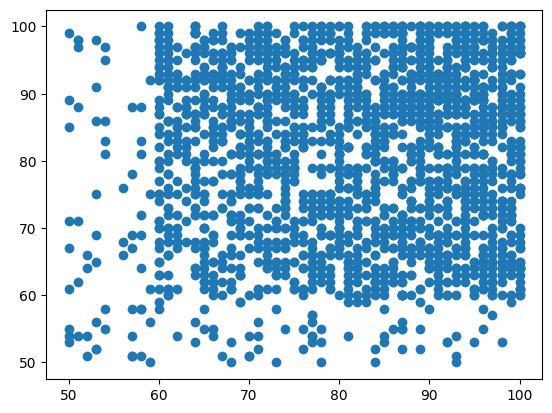

In [62]:
dataset = pd.read_csv('student-scores.csv')
plt.scatter(dataset['physics_score'],dataset['history_score'])
plt.show()
# making sure the values are not of type string from the csv.
X = dataset[['history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score']].values # Selects only numerical score columns as features, excluding 'math_score' and 'geography_score'
Y = dataset['math_score'].values # Selects a numerical target variable (e.g., 'math_score')


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.2, random_state= 0)

#3rd degree polynomial form

Y= a + bx + cd

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
print(X_poly)

[[1.00000e+00 8.10000e+01 9.30000e+01 ... 3.17520e+05 4.03200e+05
  5.12000e+05]
 [1.00000e+00 8.60000e+01 9.60000e+01 ... 7.12800e+05 6.96960e+05
  6.81472e+05]
 [1.00000e+00 9.70000e+01 9.50000e+01 ... 3.25325e+05 3.85385e+05
  4.56533e+05]
 ...
 [1.00000e+00 8.50000e+01 6.30000e+01 ... 4.34656e+05 6.00848e+05
  8.30584e+05]
 [1.00000e+00 9.60000e+01 7.20000e+01 ... 7.94200e+05 7.35680e+05
  6.81472e+05]
 [1.00000e+00 9.90000e+01 9.10000e+01 ... 6.40677e+05 7.17867e+05
  8.04357e+05]]


In [65]:
model = LinearRegression()
model.fit(X_poly,Y)

LinearRegression()

In [66]:
print(model.coef_)

[-2.10290974e-10 -1.59102262e+00  5.87492850e+00  1.06318816e+01
 -2.99471613e+00  6.26680910e+00 -2.41535342e-02  5.41712651e-02
 -8.71486955e-03  2.90548299e-02  1.34467048e-02 -9.67971732e-02
  2.21735738e-02  2.27425411e-02 -5.03418894e-02 -7.42628079e-02
 -7.37719848e-02 -4.95256192e-02  2.41351974e-02  5.36159420e-02
 -5.90912474e-02  3.36224910e-04 -3.84437569e-04 -1.43206838e-04
 -1.63112406e-04 -9.75453082e-05  1.80747621e-04 -8.87766161e-05
 -1.75693321e-04  4.75920126e-05  1.78556651e-04  3.73513103e-05
  1.01432666e-04  2.13614834e-04 -2.78201893e-04  8.60428305e-05
  3.12252408e-04  5.25393949e-05 -1.57771003e-04  1.16964366e-04
 -3.09687879e-04  1.86279433e-04  1.35401251e-04  1.10328777e-04
 -1.32473216e-04  1.87628192e-04  1.84364401e-04  3.10498722e-04
  1.38438757e-04  3.79860243e-05  8.44963888e-06  5.23480404e-05
 -2.06539582e-04 -1.12189627e-04 -2.93686010e-05  1.30487359e-04]


In [67]:
print(model.intercept_
      )

-420.2891411995948


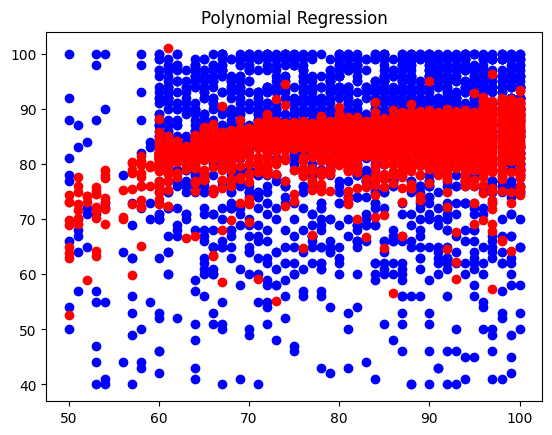

In [70]:
y_poly_pred = model.predict(X_poly)
plt.scatter(dataset['physics_score'],Y,color = 'blue')
plt.scatter( dataset['physics_score'], y_poly_pred, color = 'red')
plt.title ('Polynomial Regression')
plt.show ()

Running on the SiFive silicon board.